In [1]:
import time
import torch 
x = torch.rand(5, 3) 
print(x)

C:\Users\shane\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


tensor([[0.0189, 0.2846, 0.0621],
        [0.1213, 0.1288, 0.5956],
        [0.9276, 0.0493, 0.0031],
        [0.4427, 0.5717, 0.0833],
        [0.4812, 0.8117, 0.5844]])


In [2]:
print(x.size()) 

torch.Size([5, 3])


In [3]:
y = torch.rand(5, 3) 
z = x + y 
print(z)

tensor([[0.2257, 0.4783, 0.7851],
        [0.5291, 0.1641, 0.9187],
        [1.4825, 0.7524, 0.2909],
        [0.7293, 1.4293, 0.6849],
        [0.6495, 1.3257, 1.3671]])


In [4]:
t = x.numpy() 
print(t) 

[[0.01894206 0.28461742 0.06207496]
 [0.12125009 0.128762   0.5955537 ]
 [0.9275559  0.04926944 0.00314814]
 [0.4427178  0.5717104  0.08334827]
 [0.48115247 0.8116709  0.5843811 ]]


In [5]:
u = torch.from_numpy(t) 
print(u)

tensor([[0.0189, 0.2846, 0.0621],
        [0.1213, 0.1288, 0.5956],
        [0.9276, 0.0493, 0.0031],
        [0.4427, 0.5717, 0.0833],
        [0.4812, 0.8117, 0.5844]])


----

In [6]:
# N is batch size; D_in is input dimension; 
# H is hidden dimension; D_out is output dimension. 
N, D_in, H, D_out = 64, 1000, 100, 10 
# Create random Tensors to hold inputs and outputs 
x = torch.randn(N, D_in) 
y = torch.randn(N, D_out) 
# Use the nn package to define our model and loss function. 
model = torch.nn.Sequential( 
    torch.nn.Linear(D_in, H), 
    torch.nn.ReLU(), 
    torch.nn.Linear(H, D_out),
) 
loss_fn = torch.nn.MSELoss(reduction='sum') 
# Use the optim package to define an Optimizer that will update the weights of 
# the model for us. Here we will use Adam; the optim package contains many other 
# optimization algorithms. The first argument to the Adam constructor tells the 
# optimizer which Tensors it should update. 
learning_rate = 1e-4 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
for t in range(500): 
 # Forward pass: compute predicted y by passing x to the model. 
    y_pred = model(x) 
 # Compute and print loss. 
    loss = loss_fn(y_pred, y) 
    if t % 100 == 99: 
        print(t, loss.item()) 
 # Before the backward pass, use the optimizer object to zero all of the 
 # gradients for the variables it will update (which are the learnable 
 # weights of the model). This is because by default, gradients are 
 # accumulated in buffers( i.e, not overwritten) whenever .backward() 
 # is called. Checkout docs of torch.autograd.backward for more details. 
    optimizer.zero_grad() 
 # Backward pass: compute gradient of the loss with respect to model 
 # parameters 
    loss.backward() 
 # Calling the step function on an Optimizer makes an update to its 
 # parameters 
    optimizer.step() 

99 51.09511947631836
199 1.1099992990493774
299 0.024796951562166214
399 0.0005794574972242117
499 6.305684109975118e-06


In [7]:
class TwoLayerNet(torch.nn.Module): 
    def __init__(self, D_in, H, D_out): #D_in: input layer, H: hidden layer, D_out: output layer 
    # In the constructor we instantiate two nn.Linear modules and assign them as 
    # member variables.
        super(TwoLayerNet, self).__init__() 
        self.linear1 = torch.nn.Linear(D_in, H) 
        self.linear2 = torch.nn.Linear(H, D_out) 
     
    def forward(self, x):  
    # In the forward function we accept a Tensor of input data and we must return 
    # a Tensor of output data. We can use Modules defined in the constructor as 
    # well as arbitrary operators on Tensors. 
 
        h_relu = self.linear1(x).clamp(min=0) 
        y_pred = self.linear2(h_relu) 
        return y_pred

In [8]:
# N is batch size; D_in is input dimension; 
# H is hidden dimension; D_out is output dimension. 
N, D_in, H, D_out = 64, 1000, 100, 10 
# Create random Tensors to hold inputs and outputs 
x = torch.randn(N, D_in) 
y = torch.randn(N, D_out) 
# Construct our model by instantiating the class defined above 
model = TwoLayerNet(D_in, H, D_out) 
# Construct our loss function and an Optimizer. The call to model.parameters() 
# in the SGD constructor will contain the learnable parameters of the two 
# nn.Linear modules which are members of the model. 
criterion = torch.nn.MSELoss(reduction='sum') 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4) 
for t in range(500): 
 # Forward pass: Compute predicted y by passing x to the model 
    y_pred = model(x) 
    # Compute and print loss 
    loss = criterion(y_pred, y) 
    if t % 100 == 99: 
        print(t, loss.item()) 
 # Zero gradients, perform a backward pass, and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

99 4.079337120056152
199 0.11554257571697235
299 0.003962721675634384
399 0.00021152160479687154
499 1.619060458324384e-05


----

In [9]:
import torch 
import torchvision 
import torchvision.transforms as transforms 
transform = transforms.Compose( 
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2) 
testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) 
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2) 
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

C:\Users\shane\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


Files already downloaded and verified
Files already downloaded and verified


In C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

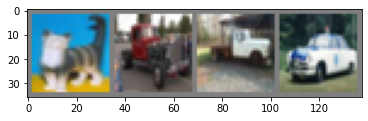

  cat truck truck   car


In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
# function to show an image 
def imshow(img): 
    img = img / 2 + 0.5 # unnormalize 
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show() 
# get some random training images 
dataiter = iter(trainloader) 
images, labels = dataiter.next() 
# show images 
imshow(torchvision.utils.make_grid(images)) 
# print true labels of the images 
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn 
import torch.nn.functional as F 
class Net(nn.Module): 
    def __init__(self): 
        super(Net, self).__init__() 
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10) 
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x) 
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x) 
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector 
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x) 
        return x 
net = Net() 

In [12]:
import torch.optim as optim 
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

[1,  2000] loss: 2.120
[1,  4000] loss: 1.783
[1,  6000] loss: 1.628
[1,  8000] loss: 1.546
[1, 10000] loss: 1.482
[1, 12000] loss: 1.419
[2,  2000] loss: 1.351
[2,  4000] loss: 1.346
[2,  6000] loss: 1.322
[2,  8000] loss: 1.302
[2, 10000] loss: 1.275
[2, 12000] loss: 1.249
Finished Training
105.38915549999999


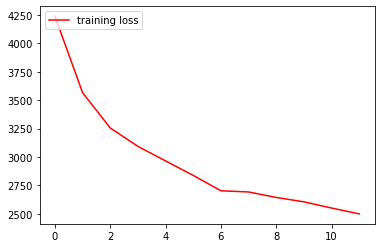

In [13]:
loss_history = [] 
epoch = 2 
tic = time.perf_counter()
for e in range(epoch): # loop over the dataset multiple times 
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0): 
 # get the inputs; data is a list of [inputs, labels] 
        inputs, labels = data 
 # zero the parameter gradients 
        optimizer.zero_grad() 
 # forward + backward + optimize 
        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
 # print statistics 
        running_loss += loss.item() 
        if i % 2000 == 1999: # print every 2000 mini-batches 
            print('[%d, %5d] loss: %.3f' % 
                (e + 1, i + 1, running_loss / 2000)) 
            loss_history.append(running_loss) 
            running_loss = 0.0 
toc = time.perf_counter()
print('Finished Training') 
print(toc-tic)
plt.plot(loss_history, label = 'training loss', color = 'r') 
plt.legend(loc = "upper left") 
plt.show() 

In [14]:
PATH = './cifar_net.pth' 
torch.save(net.state_dict(), PATH) 

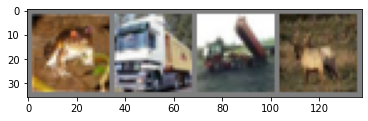

GroundTruth:   frog truck truck  deer


In [15]:
dataiter = iter(testloader) 
images, labels = dataiter.next() 
# print images 
imshow(torchvision.utils.make_grid(images)) 
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4))) 

In [16]:
#load the trained network 
net = Net() 
net.load_state_dict(torch.load(PATH)) 
outputs = net(images)

In [17]:
tic = time.perf_counter()
_, predicted_labels = torch.max(outputs, 1) 
toc = time.perf_counter()
print(toc-tic)
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] for j in range(4))) 

0.0103750999999761
Predicted:   frog truck  ship  frog


In [18]:
correct = 0 
total = 0 
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs.data, 1) 
        total += groundtruth_labels.size(0) 
        correct += (predicted_labels == groundtruth_labels).sum().item() 
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total)) 

Accuracy of the network on the 10000 test images: 56 %


In [19]:
tic = time.perf_counter()
class_correct = list(0. for i in range(10)) 
class_total = list(0. for i in range(10)) 
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs, 1) 
        c = (predicted_labels == groundtruth_labels).squeeze() 
        for i in range(4): 
            label = groundtruth_labels[i] 
            class_correct[label] += c[i].item() 
            class_total[label] += 1 
toc = time.perf_counter()
for i in range(10): 
    print('Accuracy of %5s : %2d %%' % ( 
        classes[i], 100 * class_correct[i] / class_total[i])) 
print(toc-tic)

Accuracy of plane : 65 %
Accuracy of   car : 89 %
Accuracy of  bird : 47 %
Accuracy of   cat : 22 %
Accuracy of  deer : 44 %
Accuracy of   dog : 47 %
Accuracy of  frog : 76 %
Accuracy of horse : 57 %
Accuracy of  ship : 55 %
Accuracy of truck : 54 %
27.856952500000034


----

In [20]:
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2) 

In [21]:
correct = 0 
total = 0 
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs.data, 1) 
        total += groundtruth_labels.size(0) 
        correct += (predicted_labels == groundtruth_labels).sum().item() 
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [22]:
from sklearn.metrics import confusion_matrix
gt = []
pd = []
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs, 1) 
        int_value1 = groundtruth_labels.item()
        int_value2 = predicted_labels.item()
        gt.append(int_value1)
        pd.append(int_value2)
print(confusion_matrix(gt,pd))

[[3267  485  293   64   82   33   82   44  300  350]
 [  99 4495   18   17   21    8   55   12   80  195]
 [ 433  240 2387  175  449  301  686  123   96  110]
 [ 163  217  605 1136  340  993 1076  186  108  176]
 [ 247  156  868  142 2238  208  696  290   57   98]
 [  70  123  533  579  332 2364  527  319   50  103]
 [  49  217  315   96  248   91 3845   29   40   70]
 [ 106  150  339  169  544  427  154 2857   40  214]
 [ 771  871   66   35   24   34   57   20 2758  364]
 [ 149 1676   38   46   22   27  138   64  108 2732]]


----

In [23]:
from torchvision import datasets
transform = transforms.Compose( 
    [transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
trainset = datasets.ImageFolder("FoodImages\Train", transform=transform) 
testset = datasets.ImageFolder("FoodImages\Test", transform=transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2) 
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2) 
classes = ('Cakes', 'Pasta', 'Pizza') 

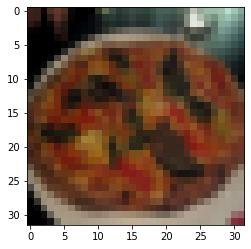

Pizza


In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
# function to show an image 
def imshow(img): 
 img = img / 2 + 0.5 # unnormalize 
 npimg = img.numpy() 
 plt.imshow(np.transpose(npimg, (1, 2, 0))) 
 plt.show() 
# get some random training images 
dataiter = iter(trainloader) 
images, labels = dataiter.next() 
# show images 
imshow(torchvision.utils.make_grid(images)) 
# print true labels of the images 
print(' '.join('%5s' % classes[labels[j]] for j in range(1))) 

In [25]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

[1,    30] loss: 2.845
[1,    60] loss: 1.194
[1,    90] loss: 0.981
[2,    30] loss: 0.527
[2,    60] loss: 0.821
[2,    90] loss: 0.490
[3,    30] loss: 0.330
[3,    60] loss: 0.474
[3,    90] loss: 0.339
[4,    30] loss: 0.111
[4,    60] loss: 0.238
[4,    90] loss: 0.168
[5,    30] loss: 0.419
[5,    60] loss: 0.516
[5,    90] loss: 0.278
[6,    30] loss: 0.035
[6,    60] loss: 0.138
[6,    90] loss: 0.155
[7,    30] loss: 0.207
[7,    60] loss: 0.022
[7,    90] loss: 0.063
[8,    30] loss: 0.041
[8,    60] loss: 0.027
[8,    90] loss: 0.017
[9,    30] loss: 0.018
[9,    60] loss: 0.006
[9,    90] loss: 0.012
[10,    30] loss: 0.008
[10,    60] loss: 0.003
[10,    90] loss: 0.004
Finished Training
19.823870399999976


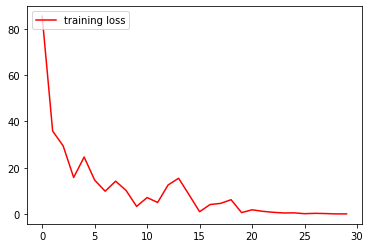

In [26]:
loss_history = [] 
epoch = 10
tic = time.perf_counter()
for e in range(epoch): # loop over the dataset multiple times 
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0): 
        # get the inputs; data is a list of [inputs, labels] 
        inputs, labels = data 
        # zero the parameter gradients 
        optimizer.zero_grad() 
        # forward + backward + optimize 
        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
        
        # print statistics 
        running_loss += loss.item() 
        if i % 30 == 29: # print every 2000 mini-batches 
            print('[%d, %5d] loss: %.3f' % 
                (e + 1, i + 1, running_loss / 30)) 
            loss_history.append(running_loss) 
            running_loss = 0.0 
toc = time.perf_counter()
print('Finished Training') 
print(toc-tic)
plt.plot(loss_history, label = 'training loss', color = 'r') 
plt.legend(loc = "upper left") 
plt.show() 

In [27]:
tic = time.perf_counter()
_, predicted_labels = torch.max(outputs, 1) 
toc = time.perf_counter()
print(toc-tic)
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] for j in range(1))) 

0.0032118999999966036
Predicted:  Cakes


In [28]:
correct = 0 
total = 0 
with torch.no_grad():
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs.data, 1) 
        total += groundtruth_labels.size(0) 
        correct += (predicted_labels == groundtruth_labels).sum().item() 
print('Accuracy of the network on the 90 test images: %d %%' % (100 * correct / total)) 

Accuracy of the network on the 90 test images: 75 %


In [29]:
gtt = []
pdd = []
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs, 1) 
        int_value1 = groundtruth_labels.item()
        int_value2 = predicted_labels.item()
        gtt.append(int_value1)
        pdd.append(int_value2)
print(confusion_matrix(gtt,pdd))

[[20  8  2]
 [ 3 24  3]
 [ 2  4 24]]


----

In [47]:
PATH = './cifar_net.pth' 
net = Net() 
net.load_state_dict(torch.load(PATH)) 

<All keys matched successfully>

In [48]:
net.fc3 = nn.Linear(84, 3) 

In [49]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=3, bias=True)
)


[1,    30] loss: 1.243
[1,    60] loss: 1.205
[1,    90] loss: 1.315
[2,    30] loss: 1.315
[2,    60] loss: 1.218
[2,    90] loss: 1.230
[3,    30] loss: 1.239
[3,    60] loss: 1.222
[3,    90] loss: 1.303
[4,    30] loss: 1.217
[4,    60] loss: 1.274
[4,    90] loss: 1.273
[5,    30] loss: 1.264
[5,    60] loss: 1.251
[5,    90] loss: 1.248
[6,    30] loss: 1.338
[6,    60] loss: 1.206
[6,    90] loss: 1.219
[7,    30] loss: 1.293
[7,    60] loss: 1.253
[7,    90] loss: 1.218
[8,    30] loss: 1.321
[8,    60] loss: 1.170
[8,    90] loss: 1.272
[9,    30] loss: 1.286
[9,    60] loss: 1.225
[9,    90] loss: 1.252
[10,    30] loss: 1.252
[10,    60] loss: 1.291
[10,    90] loss: 1.220
[11,    30] loss: 1.294
[11,    60] loss: 1.234
[11,    90] loss: 1.235
[12,    30] loss: 1.312
[12,    60] loss: 1.222
[12,    90] loss: 1.230
[13,    30] loss: 1.235
[13,    60] loss: 1.295
[13,    90] loss: 1.233
[14,    30] loss: 1.345
[14,    60] loss: 1.233
[14,    90] loss: 1.184
[15,    30] loss: 1

[115,    30] loss: 1.222
[115,    60] loss: 1.261
[115,    90] loss: 1.280
[116,    30] loss: 1.320
[116,    60] loss: 1.218
[116,    90] loss: 1.225
[117,    30] loss: 1.259
[117,    60] loss: 1.172
[117,    90] loss: 1.332
[118,    30] loss: 1.270
[118,    60] loss: 1.259
[118,    90] loss: 1.234
[119,    30] loss: 1.290
[119,    60] loss: 1.204
[119,    90] loss: 1.269
[120,    30] loss: 1.266
[120,    60] loss: 1.252
[120,    90] loss: 1.245
[121,    30] loss: 1.269
[121,    60] loss: 1.189
[121,    90] loss: 1.305
[122,    30] loss: 1.311
[122,    60] loss: 1.186
[122,    90] loss: 1.266
[123,    30] loss: 1.285
[123,    60] loss: 1.282
[123,    90] loss: 1.197
[124,    30] loss: 1.188
[124,    60] loss: 1.295
[124,    90] loss: 1.281
[125,    30] loss: 1.323
[125,    60] loss: 1.242
[125,    90] loss: 1.199
[126,    30] loss: 1.213
[126,    60] loss: 1.296
[126,    90] loss: 1.254
[127,    30] loss: 1.240
[127,    60] loss: 1.223
[127,    90] loss: 1.300
[128,    30] loss: 1.224


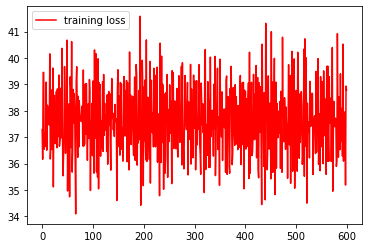

In [54]:
loss_history = [] 
epoch = 200
tic = time.perf_counter()
for e in range(epoch): # loop over the dataset multiple times 
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0): 
        # get the inputs; data is a list of [inputs, labels] 
        inputs, labels = data 
        # zero the parameter gradients 
        optimizer.zero_grad() 
        # forward + backward + optimize 
        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
        
        # print statistics 
        running_loss += loss.item() 
        if i % 30 == 29: # print every 2000 mini-batches 
            print('[%d, %5d] loss: %.3f' % 
                (e + 1, i + 1, running_loss / 30)) 
            loss_history.append(running_loss) 
            running_loss = 0.0 
toc = time.perf_counter()
print('Finished Training') 
print(toc-tic)
plt.plot(loss_history, label = 'training loss', color = 'r') 
plt.legend(loc = "upper left") 
plt.show() 

In [55]:
tic = time.perf_counter()
_, predicted_labels = torch.max(outputs, 1) 
toc = time.perf_counter()
print(toc-tic)
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] for j in range(1))) 

0.0002730000001065491
Predicted:  Cakes


In [56]:
correct = 0 
total = 0 
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs.data, 1) 
        total += groundtruth_labels.size(0) 
        correct += (predicted_labels == groundtruth_labels).sum().item() 
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total)) 

Accuracy of the network on the 10000 test images: 23 %


In [57]:
gttt = []
pddd = []
with torch.no_grad(): 
    for data in testloader: 
        images, groundtruth_labels = data 
        outputs = net(images) 
        _, predicted_labels = torch.max(outputs, 1) 
        int_value1 = groundtruth_labels.item()
        int_value2 = predicted_labels.item()
        gttt.append(int_value1)
        pddd.append(int_value2)
print(confusion_matrix(gttt,pddd))

[[11  5 14]
 [18  1 11]
 [21  0  9]]
